# Assignment #2
### deadline 1402/08/25

 <img src="header.png">

In [13]:
Student_name = 'Ghadir Rahmaninia'
Student_ID = 40106324

## Aeroelasticity



Aeroelasticity is the branch of physics and engineering studying the interactions between the inertial, elastic, and aerodynamic forces occurring while an elastic body is exposed to a fluid flow. The study of aeroelasticity may be broadly classified into two fields: static aeroelasticity dealing with the static or steady state response of an elastic body to a fluid flow; and dynamic aeroelasticity dealing with the body's dynamic (typically vibrational) response. 



## What is flutter?
**Flutter** is a dynamic instability that can lead to the destruction of an aircraft.

<video controls align ="center" src="flutter.mp4" style="width:450px;"/> 

In this assignment, a predictive model using polynominal regression technique is created to estimate the *flutter speed* in terms of the fiber angle of a composite wing. 

### import utilities
The numpy and matplotlib libraries are imported.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

### load data
The fuction *loadtxt()* of numpy is used to load data from a txet file.

In [3]:
x,y = np.loadtxt('flutter.csv', delimiter= ',', unpack=True, skiprows=1)

The loaded data is the flutter speed of a composit wing (y) in terms of the fiber angle (x). In the following, the data has been visualized by using matplotlib.

Text(0, 0.5, 'Flutter speed (m/s)')

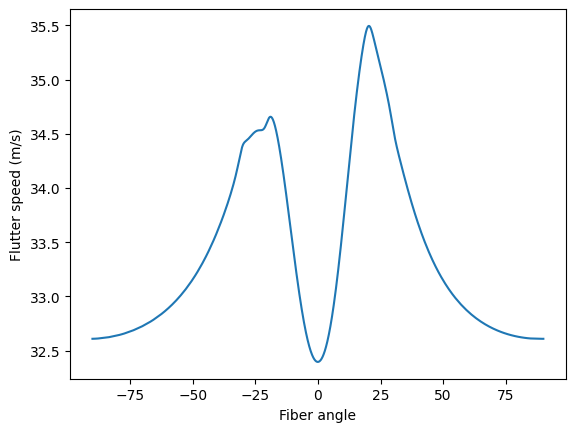

In [4]:
plt.plot(x,y)
plt.xlabel('Fiber angle')
plt.ylabel('Flutter speed (m/s)')

### Training set
The trainng set has been prepared as a subset of the loaded data contaminated with noises.

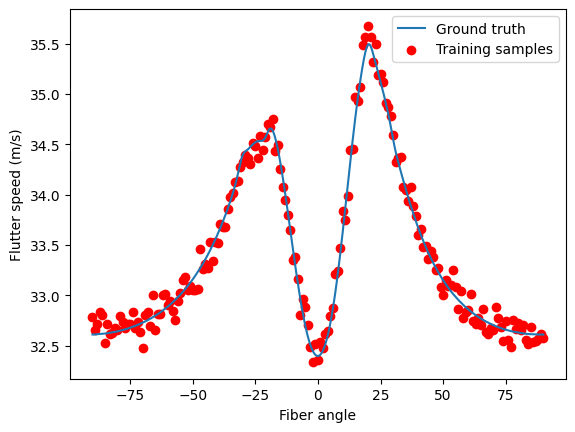

In [5]:
np.random.seed(0)
x_train = x[::100]
y_train = y[::100]+np.random.randn(len(x_train))*0.1
plt.plot(x,y,label='Ground truth')
plt.scatter(x_train, y_train,label='Training samples', color ='r')
plt.xlabel('Fiber angle')
plt.ylabel('Flutter speed (m/s)')
plt.legend()

The students should use the **polynomial regreesion** to create the predictive models for flutter speed of the considered composite wing. The students are encouraged to utilize the **sklearn** package. Try different polynomial regressors with different degree and discuss the results. Also, try to find the best model.

Th following functions from sklearn can be used:
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression) (`from sklearn.linear_model import LinearRegression`)
- [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=polynomial+regression) (`from sklearn.preprocessing import PolynomialFeatures, StandardScaler`)
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler)
- [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler) (`from sklearn.pipeline import make_pipeline`)

**Hint**: Different models can be compared using **score** method. The best possibe score is 1.0.

In [6]:
x_n = x_train.reshape(-1, 1)    # or x_n = x_train.reshape(x_train.size, 1)

In [7]:
# Important libraries
# This cell must be executed
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.pipeline import make_pipeline

import numpy as np
from matplotlib import pyplot as plt

import ipywidgets as widgets
from sklearn.metrics import mean_squared_error

score : 0.0005914161912963234
MSD : 0.6926108815697926


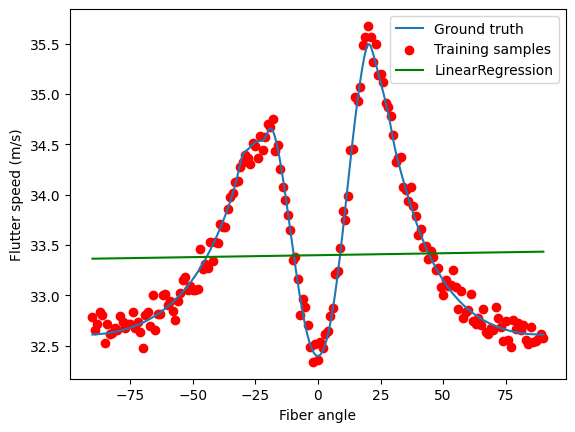

In [8]:
# LinearRegression

reg = LinearRegression().fit(x_n, y_train)

y_p1 = reg.predict(x_n)

score = reg.score(x_n, y_train)
print(f"score : {score}")

m = mean_squared_error(y_train, y_p1)
print(f"MSD : {m}")

plt.plot(x, y, label='Ground truth')
plt.scatter(x_train, y_train, label='Training samples', color ='r')
plt.plot(x_train, y_p1, label='LinearRegression', color = 'g')
plt.xlabel('Fiber angle')
plt.ylabel('Flutter speed (m/s)')
plt.legend()
plt.show()

In [9]:
# PolynomialFeatures & StandardScaler

def abc(degree):
    poly = PolynomialFeatures(degree)

    scaler = StandardScaler()

    x_n2 = poly.fit_transform(x_n)

    x_p = scaler.fit_transform(x_n2)

    reg2 = LinearRegression().fit(x_p, y_train)

    y_p2 = reg2.predict(x_p)

    score = reg2.score(x_p, y_train)
    print(f"score : {score}")

    m = mean_squared_error(y_train, y_p2)
    print(f"MSD : {m}")
    
    plt.plot(x, y, label='Ground truth')
    plt.scatter(x_train, y_train, label='Training samples', color ='r')
    plt.plot(x_train, y_p2, label = 'poly and scalar', color = 'g')
    plt.xlabel('Fiber angle')
    plt.ylabel('Flutter speed (m/s)')
    plt.legend()
    plt.show()

widgets.interact(abc, degree=(1,40,1));

interactive(children=(IntSlider(value=20, description='degree', max=40, min=1), Output()), _dom_classes=('widg…

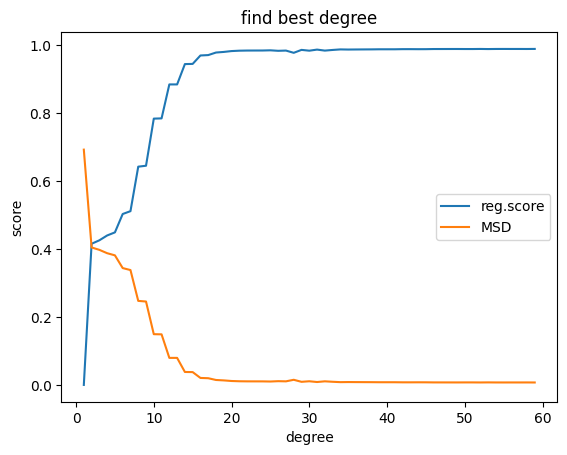

In [10]:
# Calculate the best degree in PolynomialFeatures & StandardScaler

I = []
S = []
M = []

for i in range(1,60):
    I.append(i)

    poly = PolynomialFeatures(i)
    scaler = StandardScaler()
    
    x_nn = poly.fit_transform(x_n)
    x_p = scaler.fit_transform(x_nn)

    reg = LinearRegression().fit(x_p, y_train)
    y_p = reg.predict(x_p)
    
    s = reg.score(x_p, y_train)
    S.append(s)

    m = mean_squared_error(y_train, y_p)
    M.append(m)
    

plt.plot(I, S, label = 'reg.score')
plt.plot(I, M, label = 'MSD')
plt.xlabel('degree')
plt.ylabel('score')
plt.title('find best degree')
plt.legend()
plt.show()

In [11]:
# make_pipeline

def abc(degree):
    pipe = make_pipeline(PolynomialFeatures(degree), StandardScaler(), 
                         LinearRegression()).fit(x_n, y_train)


    y_p3 = pipe.predict(x_n)

    score = pipe.score(x_n, y_train)
    print(f"score : {score}")

    m = mean_squared_error(y_train, y_p3)
    print(f"MSD : {m}")

    plt.plot(x,y,label='Ground truth')
    plt.scatter(x_train, y_train, label='Training samples', color ='r')
    plt.plot(x_train, y_p3, label = 'make_pipeline', color = 'g')
    plt.xlabel('Fiber angle')
    plt.ylabel('Flutter speed (m/s)')
    plt.legend()
    plt.show()

widgets.interact(abc, degree=(1,40,1));

interactive(children=(IntSlider(value=20, description='degree', max=40, min=1), Output()), _dom_classes=('widg…

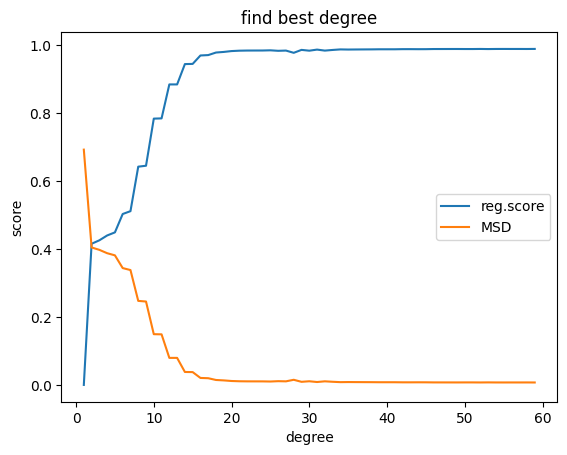

In [12]:
# Calculate the best degree in make_pipeline

I = []
S = []
M = []

for i in range(1,60):
    I.append(i)

    pipe = make_pipeline(PolynomialFeatures(i),StandardScaler(),
                            LinearRegression()).fit(x_n, y_train)
    
    y_p = pipe.predict(x_n)

    s = pipe.score(x_n, y_train)
    S.append(s)
    
    m = mean_squared_error(y_train, y_p)
    M.append(m)

plt.plot(I, S, label = 'reg.score')
plt.plot(I, M, label = 'MSD')
plt.xlabel('degree')
plt.ylabel('score')
plt.title('find best degree')
plt.legend()
plt.show()

## Conclusion
Based on the score calculation and observing the behavior of the graphs, it can be concluded that we see more appropriate results in degree = 25 or 24.

For higher degrees, the graph suffers from the phenomenon of overfitting.